In [94]:
cd C:\Users\Hi\Desktop\End to End projects

C:\Users\Hi\Desktop\End to End projects


In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [96]:
df = pd.read_csv('BankNote_Authentication.csv')

In [97]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [98]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [99]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

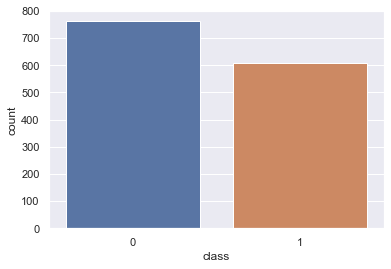

In [100]:
sns.countplot(x=df['class'])

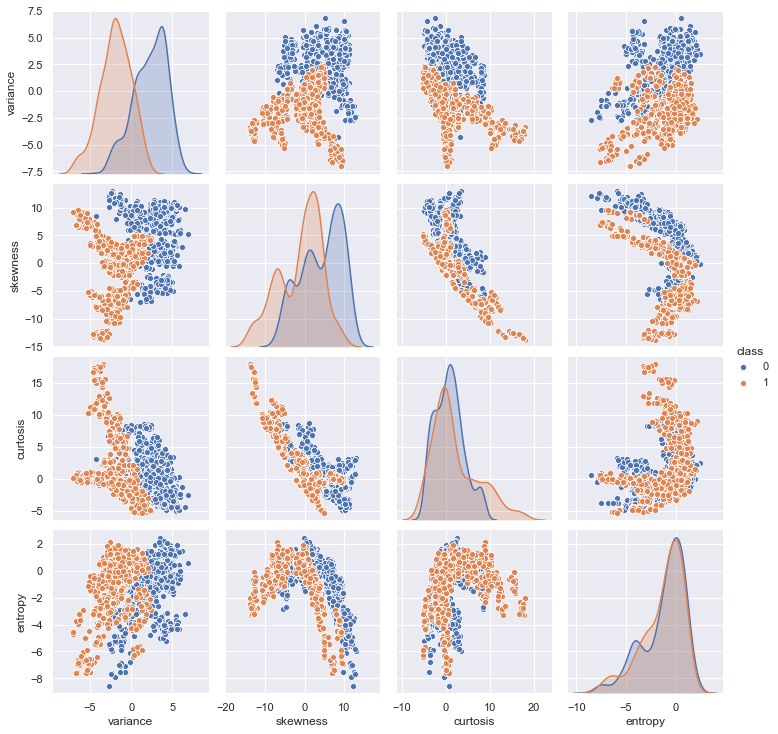

In [101]:
sns.pairplot(df,hue='class')

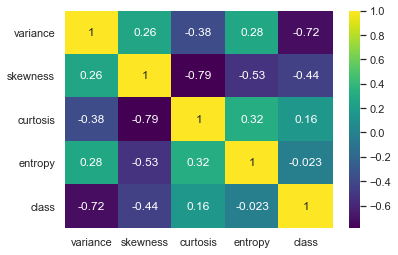

In [102]:
sns.heatmap(df.corr(),annot=True,cmap='viridis')

In [103]:
df.columns

Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')

In [104]:
columns = list(df.columns)
columns.remove('class')

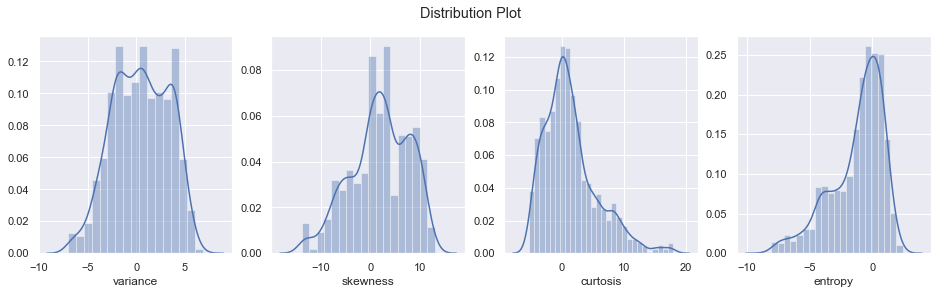

In [105]:
fig, ax = plt.subplots(ncols = 4, figsize=(16, 4))
fig.suptitle("Distribution Plot")

for index, column in enumerate(columns):
    sns.distplot(df[column], ax=ax[index])


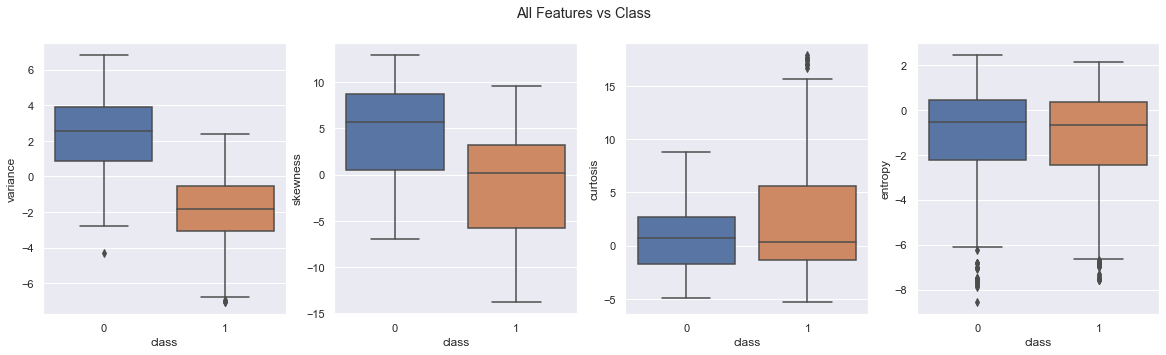

In [106]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 5))
fig.suptitle("All Features vs Class")

for index, column in enumerate(columns):
    sns.boxplot(x="class", y=column, data=df, ax=ax[index])

In [107]:
X = df.iloc[:,0:4].values
y = df.iloc[:,-1].values


In [108]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [109]:
print(X_train.shape)
print(X_test.shape)

(960, 4)
(412, 4)


## Data Pre-processing

In [110]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [111]:
print("X_train:\n", X_train)
print("\n")
print("X_test:\n", X_test)

X_train:
 [[-0.13807361  0.74073163  0.08960794  0.20786696]
 [-0.63177254 -0.28028795 -0.11301437  1.30501681]
 [ 1.35320992 -1.14850598  0.47129287  0.27628242]
 ...
 [ 1.2155146  -0.81135505  0.18893193  0.69849633]
 [-0.70405647 -0.12961769 -0.48659588  0.151778  ]
 [-0.08470315  0.01679686 -1.08020277  0.25717776]]


X_test:
 [[-0.97191171  1.80889306 -0.1595149  -3.06321954]
 [ 1.60404076 -0.40259703 -0.20561823  1.07879248]
 [-0.8552527  -1.46297345  1.76003372  0.59926221]
 ...
 [ 0.05985076  0.35536978 -1.41383068 -1.54323612]
 [-0.65671608 -0.63091532  0.6076353   0.81437314]
 [ 0.57465751 -1.47856404  1.63242053  0.26457557]]


### 1. Logisctic regression

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [113]:
classifier = LogisticRegression(solver='liblinear',random_state=1)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [114]:
y_pred = classifier.predict(X_test)

In [115]:
from sklearn.metrics import classification_report,confusion_matrix

In [116]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       238
           1       0.97      1.00      0.98       174

    accuracy                           0.99       412
   macro avg       0.98      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



In [117]:
cm = confusion_matrix(y_test,y_pred)

In [118]:
cm

array([[232,   6],
       [  0, 174]], dtype=int64)

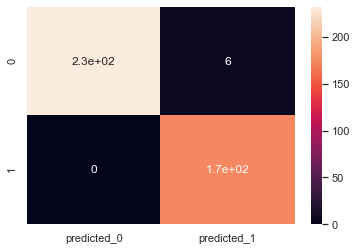

In [119]:
df_cm = pd.DataFrame(cm,index=[0,1],columns=['predicted_0','predicted_1'])
sns.heatmap(df_cm,annot=True)

## 2. Support vector mechine

In [120]:
from sklearn.svm import SVC

In [134]:
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train,y_train)

svm_accuracies = cross_val_score(estimator=svm_classifier,X=X_train,y=y_train,cv=10)

In [135]:
print("Mean Accuracy:",svm_accuracies.mean())

Mean Accuracy: 0.9833333333333334


In [136]:
y_pred_svc = svm_classifier.predict(X_test)

In [137]:
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       238
           1       0.97      1.00      0.99       174

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



In [138]:
cm_svm = confusion_matrix(y_test,y_pred_svc)

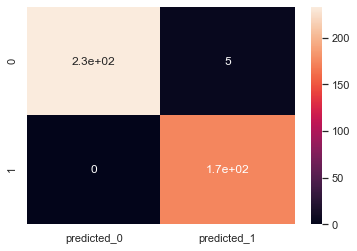

In [140]:
df_cm_svm = pd.DataFrame(cm_svm,index=[0,1],columns=['predicted_0','predicted_1'])
sns.heatmap(df_cm_svm,annot=True)

### 3.Random Forest Classifier

In [156]:
from sklearn.ensemble import RandomForestClassifier
rfc_classifier = RandomForestClassifier(criterion='entropy')
rfc_classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy')

In [157]:
rfc_accuracies = cross_val_score(estimator=rfc_classifier,X=X_train,y=y_train,cv=10)

In [158]:
print("Mean Accuracy:",rfc_accuracies.mean())

Mean Accuracy: 0.9947916666666667


In [159]:
print("RandomTreeClassifier Train Score: ", rfc.score(X_train, y_train))
print("RandomTreeClassifier Test Score: ", rfc.score(X_test, y_test))

RandomTreeClassifier Train Score:  1.0
RandomTreeClassifier Test Score:  0.9902912621359223


In [160]:
y_pred_rfc = rfc_classifier.predict(X_test)

In [161]:
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       238
           1       0.97      1.00      0.99       174

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



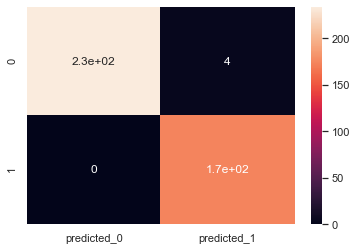

In [162]:
cm_rfc = confusion_matrix(y_test,y_pred_rfc)
df_cm_rfc = pd.DataFrame(cm_rfc,index=[0,1],columns=['predicted_0','predicted_1'])
sns.heatmap(df_cm_rfc,annot=True)

### 4.KNN Classifier

In [175]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, GridSearchCV

In [176]:
param_grid = {'leaf_size': [2,5,7,9,11],'n_neighbors':[2,5,7,9,11],'p':[1,2]}

grid = GridSearchCV(KNeighborsClassifier(),param_grid=param_grid)

grid.fit(X_train, y_train)


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [2, 5, 7, 9, 11],
                         'n_neighbors': [2, 5, 7, 9, 11], 'p': [1, 2]})

In [177]:
grid.best_params_

{'leaf_size': 2, 'n_neighbors': 2, 'p': 1}

In [178]:
KNN = KNeighborsClassifier(n_neighbors=2 ,p=1 ,leaf_size=2 )

In [179]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=2, n_neighbors=2, p=1)

In [180]:
KNN_pred = KNN.predict(X_test)

In [181]:
knn_accuracies = cross_val_score(estimator=KNN,X=X_train,y=y_train,cv=10)

In [182]:
print("Mean Accuracy:",knn_accuracies.mean())

Mean Accuracy: 0.9989583333333334


In [183]:
print(classification_report(y_test,KNN_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       238
           1       0.99      1.00      1.00       174

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



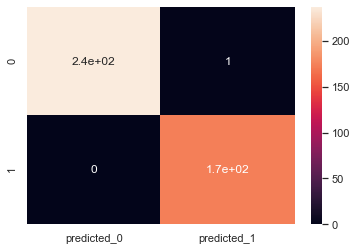

In [184]:
cm_knn = confusion_matrix(y_test,KNN_pred)
df_cm_knn = pd.DataFrame(cm_knn,index=[0,1],columns=['predicted_0','predicted_1'])
sns.heatmap(df_cm_knn,annot=True)